In [206]:
# Code for getting FTX futures and spot prices

import datetime as dt
import time

import pandas as pd

from ftxclient import FtxClient
from mysecrets import FTX_READ_API_KEY, FTX_READ_API_SECRET

client = FtxClient(FTX_READ_API_KEY, FTX_READ_API_SECRET)

client.get_markets()

def format_price_data(price_data_dict):
    return pd.DataFrame(
        price_data_dict
    )\
    .set_index("startTime")\
    ["close"]

def get_prices_df(symbols, start, end):
    all_prices = []
    res_ = 3_600 # hourly prices
    
    # get all data
    for symbol in symbols:
        print("symbol", symbol)

        seen_start = end # dummy initialization
        asset_prices = []
        while seen_start > start:
            asset_prices_chunk = client.get_historical_prices(
                symbol,
                res_,
                start,
                seen_start
            )
            
            new_seen_start = asset_prices_chunk[0]["time"] / 1000
            if new_seen_start == seen_start:
                break

            seen_start = new_seen_start
            
            asset_prices += asset_prices_chunk
            time.sleep(1/12)

        asset_prices = format_price_data(asset_prices)
        asset_prices = asset_prices[~asset_prices.index.duplicated(keep='first')].sort_index()
        asset_prices.name = symbol

        all_prices.append(asset_prices)

    return pd.concat(all_prices, axis=1)

In [2]:
asset_symbols = [
    "BTC",
    "ETH",
    "AAVE",
    "BNB",
    "XRP",
    "SOL",
    "DOT",
    "AVAX",
    "UNI",
]

spot_symbols = [
    symbol + "/USD"
    for symbol in asset_symbols
]

futures_symbols = [
    symbol + "-0624"
    for symbol in asset_symbols
]


start_timestamp = dt.datetime(year=2021, month=12, day=21).timestamp()
end_timestamp = dt.datetime(year=2022, month=6, day=26).timestamp()

prices_df = get_prices_df(
    spot_symbols+futures_symbols, 
    start_timestamp, 
    end_timestamp
)

# only consider back to where ETH-0930 existed
prices_df = prices_df.loc[prices_df["ETH-0624"].dropna().index]

prices_df

symbol BTC/USD
symbol ETH/USD
symbol AAVE/USD
symbol BNB/USD
symbol XRP/USD
symbol SOL/USD
symbol DOT/USD
symbol AVAX/USD
symbol UNI/USD
symbol BTC-0624
symbol ETH-0624
symbol AAVE-0624
symbol BNB-0624
symbol XRP-0624
symbol SOL-0624
symbol DOT-0624
symbol AVAX-0624
symbol UNI-0624


,BTC/USD,ETH/USD,AAVE/USD,BNB/USD,XRP/USD,SOL/USD,DOT/USD,AVAX/USD,UNI/USD,BTC-0624,ETH-0624,AAVE-0624,BNB-0624,XRP-0624,SOL-0624,DOT-0624,AVAX-0624,UNI-0624
startTime,,,,,,,,,,,,,,,,,,
2021-12-23T06:00:00+00:00,48500.0,3961.9,220.86,531.085,0.993725,180.0775,27.617,120.7140,16.811,50697.0,4137.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T07:00:00+00:00,48143.0,3911.4,217.49,526.714,0.972400,177.9525,27.183,117.7700,16.445,50235.0,4088.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T08:00:00+00:00,48361.0,3930.9,223.22,527.745,0.987700,179.9125,27.418,119.3670,16.676,50538.0,4109.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T09:00:00+00:00,48397.0,3931.9,224.46,526.809,0.985375,179.1200,27.349,119.4050,16.529,50546.0,4103.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T10:00:00+00:00,48462.0,3943.8,229.56,527.999,0.979025,178.7950,27.126,118.6450,16.695,50599.0,4115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23T22:00:00+00:00,20976.0,1140.5,66.12,228.389,0.333600,37.7175,7.694,18.0900,5.517,20982.0,1141.5,66.16,228.4100,0.333150,37.6475,7.672,18.107,5.528
2022-06-23T23:00:00+00:00,21091.0,1143.5,67.89,228.624,0.335450,38.1250,7.769,18.2770,5.617,21083.0,1144.6,68.35,228.6675,0.335475,38.1075,7.747,18.256,5.605
2022-06-24T00:00:00+00:00,20991.0,1142.5,67.22,228.433,0.343525,37.9475,7.745,18.0430,5.639,20977.0,1143.1,67.77,228.4725,0.343725,37.8850,7.727,18.060,5.639


In [4]:
# find the futures basis for our price dataframe

bases0624 = {}
for asset_symbol in asset_symbols:
    futures_symbol = asset_symbol + "-0624"
    spot_symbol = asset_symbol + "/USD"
    
    bases0624[asset_symbol] = (prices_df[spot_symbol] - prices_df[futures_symbol]) / prices_df[spot_symbol]

bases0624 = pd.DataFrame(bases0624); bases0624

,BTC,ETH,AAVE,BNB,XRP,SOL,DOT,AVAX,UNI
startTime,,,,,,,,,
2021-12-23T06:00:00+00:00,-0.045299,-0.044347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T07:00:00+00:00,-0.043454,-0.045303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T08:00:00+00:00,-0.045016,-0.045511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T09:00:00+00:00,-0.044404,-0.043567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T10:00:00+00:00,-0.044096,-0.043410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-06-23T22:00:00+00:00,-0.000286,-0.000877,-0.000605,-0.000092,0.001349,0.001856,0.002859,-0.000940,-0.001994
2022-06-23T23:00:00+00:00,0.000379,-0.000962,-0.006776,-0.000190,-0.000075,0.000459,0.002832,0.001149,0.002136
2022-06-24T00:00:00+00:00,0.000667,-0.000525,-0.008182,-0.000173,-0.000582,0.001647,0.002324,-0.000942,0.000000


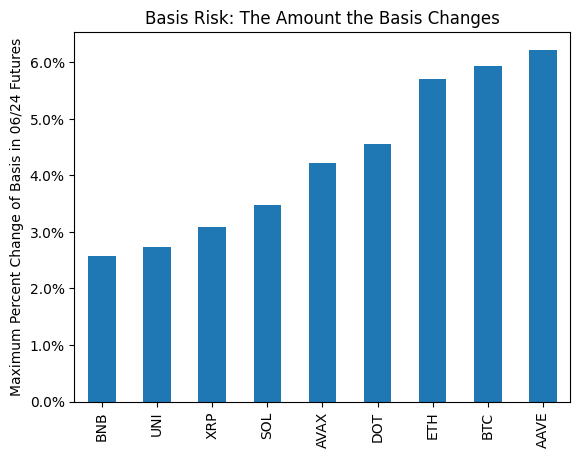

In [286]:
import matplotlib.ticker as mtick

plt.rcParams.update(plt.rcParamsDefault)

plt.title("Basis Risk: The Amount the Basis Changes")
ax = (100*(bases0624.max() - bases0624.min())).sort_values().plot(kind="bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.xlabel("Asset")
plt.ylabel("Maximum Percent Change of Basis in 06/24 Futures");

In [197]:
futures_expiry_time = dt.datetime.strptime(bases0624.index[-1], "%Y-%m-%dT%H:%M:%S%z")

last_hours_to_drop = 24*10
bases0624_annualized = bases0624.copy().drop(bases0624.index[-last_hours_to_drop:])
for i in range(len(bases0624)-last_hours_to_drop):
    row = bases0624.iloc[i]
    time_ = dt.datetime.strptime(row.name, "%Y-%m-%dT%H:%M:%S%z")
    diff_td = futures_expiry_time - time_
    diff_years = diff_td / dt.timedelta(days=365)
    
    annualized_rate = (1-row) ** (1/diff_years) - 1
    bases0624_annualized.iloc[i] = annualized_rate
    
bases0624_annualized

,BTC,ETH,AAVE,BNB,XRP,SOL,DOT,AVAX,UNI
startTime,,,,,,,,,
2021-12-23T06:00:00+00:00,0.092473,0.090489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T07:00:00+00:00,0.088648,0.092505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T08:00:00+00:00,0.091926,0.092961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T09:00:00+00:00,0.090671,0.088926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23T10:00:00+00:00,0.090051,0.088620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-06-13T22:00:00+00:00,0.014440,0.039940,0.721294,0.001145,-0.115879,-0.138541,-0.332629,-0.089579,0.096068
2022-06-13T23:00:00+00:00,0.054438,0.036460,-0.330050,-0.054751,-0.200476,-0.070093,-0.306924,-0.269637,-0.093874
2022-06-14T00:00:00+00:00,0.027060,0.021887,0.630355,0.024749,-0.082945,-0.060859,-0.397755,-0.094323,0.174914


# Get lending rates

In [36]:
# Code for getting FTX lending rates

import requests
import json

FTX_API_BASE = "https://ftx.com/api"

symb_ = ["BTC"]
start_ = dt.datetime(year=2021, month=12, day=21).timestamp()
end_ = dt.datetime(year=2022, month=6, day=26).timestamp()


def _get_lending_rates_request(start, end, _filter):
    result = requests.get( # not available on python client API
        FTX_API_BASE + 
        "/spot_margin/history" +
        f"?start_time={start}&end_time={end}"
    ).json()["result"]
    
    result = list(filter(_filter, result)) # remove all irrelevant coins
    
    return result

def make_default_filter(symbols):
    def _default_filter(lend_rate_obj):
        return lend_rate_obj["coin"] in symbols
    
    return _default_filter

def get_lending_rates(symbols, start, end):
    all_rates = {
        symbol: {}
        for symbol in symbols
    }

    print(f"Starting lending rates backfill.")
    print(f"End:\t{end}")
    print(f"Start:\t{start}\n")
    
    # get all data
    seen_start = end # dummy initialization
    while seen_start > start:
        print(f"Time:\t{seen_start}.")
        lending_rates_chunk =  _get_lending_rates_request(
            start,
            seen_start,
            make_default_filter(symbols)
        )
        
        for lending_rate_obj in lending_rates_chunk:
            symbol = lending_rate_obj["coin"]
            time_ = lending_rate_obj["time"]
            time_ = dt.datetime.strptime(
                time_,
                "%Y-%m-%dT%H:%M:%S%z" # for reference: 2022-06-26T05:00:00+00:00
            ).timestamp()
            
            all_rates[symbol][time_] = lending_rate_obj["rate"]
            
            seen_start = min([seen_start, time_])

        time.sleep(1/12)

    all_rates = pd.DataFrame(all_rates).sort_index()
    return all_rates

In [37]:
lending_rates_ = get_lending_rates(
    asset_symbols + ["USD"], 
    start_, 
    end_
)

Starting lending rates backfill.
End:	1656219600.0
Start:	1640066400.0

Time:	1656219600.0.
Time:	1656046800.0.
Time:	1655874000.0.
Time:	1655701200.0.
Time:	1655528400.0.
Time:	1655355600.0.
Time:	1655182800.0.
Time:	1655010000.0.
Time:	1654840800.0.
Time:	1654671600.0.
Time:	1654502400.0.
Time:	1654329600.0.
Time:	1654156800.0.
Time:	1653984000.0.
Time:	1653811200.0.
Time:	1653638400.0.
Time:	1653465600.0.
Time:	1653292800.0.
Time:	1653120000.0.
Time:	1652947200.0.
Time:	1652774400.0.
Time:	1652601600.0.
Time:	1652428800.0.
Time:	1652256000.0.
Time:	1652083200.0.
Time:	1651910400.0.
Time:	1651737600.0.
Time:	1651564800.0.
Time:	1651392000.0.
Time:	1651219200.0.
Time:	1651046400.0.
Time:	1650873600.0.
Time:	1650700800.0.
Time:	1650528000.0.
Time:	1650355200.0.
Time:	1650182400.0.
Time:	1650009600.0.
Time:	1649836800.0.
Time:	1649664000.0.
Time:	1649491200.0.
Time:	1649318400.0.
Time:	1649145600.0.
Time:	1648972800.0.
Time:	1648800000.0.
Time:	1648627200.0.
Time:	1648454400.0.
Time:	16

In [38]:
lending_rates_new_ = lending_rates_[~lending_rates_.index.duplicated(keep='first')]
lending_rates_new_.index = [
    dt.datetime.fromtimestamp(x).strftime("%Y-%m-%dT%H:%M:%S+00:00")
    for x in lending_rates_new_.index
]
lending_rates_new_ = lending_rates_new_.loc[bases0624.index.intersection(lending_rates_new_.index)]
lending_rates0624 = lending_rates_new_
lending_rates0624

,BTC,ETH,AAVE,BNB,XRP,SOL,DOT,AVAX,UNI,USD
2021-12-23T06:00:00+00:00,0.000001,0.000001,0.000011,0.000003,0.000002,0.000002,NaN,NaN,0.000001,0.000003
2021-12-23T07:00:00+00:00,0.000001,0.000001,0.000011,0.000003,0.000034,0.000002,NaN,NaN,0.000001,0.000003
2021-12-23T08:00:00+00:00,0.000001,0.000001,0.000001,0.000003,0.000034,0.000002,NaN,NaN,0.000001,0.000002
2021-12-23T09:00:00+00:00,0.000001,0.000001,0.000001,0.000003,0.000285,0.000002,NaN,NaN,0.000001,0.000002
2021-12-23T10:00:00+00:00,0.000001,0.000001,0.000001,0.000003,0.000057,0.000002,NaN,NaN,0.000001,0.000002
...,...,...,...,...,...,...,...,...,...,...
2022-06-23T22:00:00+00:00,0.000004,0.000003,0.000001,0.000007,0.000034,0.000005,0.000003,0.000010,0.000001,0.000002
2022-06-23T23:00:00+00:00,0.000004,0.000003,0.000001,0.000007,0.000034,0.000005,0.000003,0.000010,0.000001,0.000002
2022-06-24T00:00:00+00:00,0.000004,0.000003,0.000001,0.000007,0.000001,0.000005,0.000003,0.000006,0.000001,0.000002
2022-06-24T01:00:00+00:00,0.000005,0.000003,0.000001,0.000007,0.000001,0.000005,0.000003,0.000006,0.000001,0.000002


In [39]:
# annualize rates with 100((1+RATE)^(24*365)-1)
lending_rates0624_annualized = lending_rates0624.applymap(lambda x: (1+x)**(24*365)-1)

<AxesSubplot:>

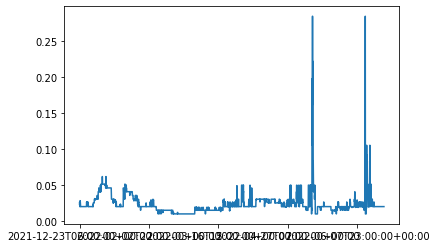

In [41]:
lending_rates0624_annualized.USD.plot()

In [72]:
borrow_rates0624 = lending_rates0624.applymap(lambda x: x * (1 + 5*0.07)) # FTX's spot margin fee for lowest tier borrowers; see here: https://help.ftx.com/hc/en-us/articles/360053007671-Spot-Margin-Trading-Explainer%20
borrow_rates0624_annualized = borrow_rates0624.applymap(lambda x: (1+x)**(24*365)-1)



# Get funding rates

In [223]:
# Get funding rates

# def format_price_data(price_data_dict):
#     return pd.DataFrame(
#         price_data_dict
#     )\
#     .set_index("startTime")\
#     ["close"]

def get_funding_rates(symbols, start, end):
    all_rates = []
    
    # get all data
    for symbol in symbols:
        print("symbol", symbol)

        seen_start = end # dummy initialization
        asset_rates = []
        while seen_start > start:
            funding_rates_chunk = client.get_funding_rates(
                symbol,
                start,
                seen_start
            )

            new_seen_start = dt.datetime.strptime(
                funding_rates_chunk[-1]["time"],
                "%Y-%m-%dT%H:%M:%S%z" # for reference: 2022-06-26T05:00:00+00:00
            ).timestamp() # time of the last funding rate that showed up
            
            if new_seen_start == seen_start:
                break
            else:
                seen_start = new_seen_start
                asset_rates += funding_rates_chunk
                time.sleep(1/12)

        asset_rates = pd.DataFrame(asset_rates).set_index("time")["rate"]
        asset_rates = asset_rates[~asset_rates.index.duplicated(keep='first')].sort_index()
        asset_rates.name = symbol
        all_rates.append(asset_rates)
        
    return pd.concat(all_rates, axis=1)
            
#             new_seen_start = funding_rates_chunk[-1]
#             funding_rates_chunk[]
#             time_ = dt.datetime.strptime(
#                 time_,
#                 "%Y-%m-%dT%H:%M:%S%z" # for reference: 2022-06-26T05:00:00+00:00
#             ).timestamp()
            
#             new_seen_start = asset_prices_chunk[0]["time"] / 1000
#             if new_seen_start == seen_start:
#                 break

#             seen_start = new_seen_start
            
#             asset_prices += asset_prices_chunk
#             time.sleep(1/12)

#         asset_prices = format_price_data(asset_prices)
#         asset_prices = asset_prices[~asset_prices.index.duplicated(keep='first')].sort_index()
#         asset_prices.name = symbol

#         all_prices.append(asset_prices)

#     return pd.concat(all_prices, axis=1)


funding_rates0624_ = get_funding_rates(
    [
        symbol + "-PERP"
        for symbol in asset_symbols
    ],
    start_,
    end_
); funding_rates0624_


symbol BTC-PERP
symbol ETH-PERP
symbol AAVE-PERP
symbol BNB-PERP
symbol XRP-PERP
symbol SOL-PERP
symbol DOT-PERP
symbol AVAX-PERP
symbol UNI-PERP


,BTC-PERP,ETH-PERP,AAVE-PERP,BNB-PERP,XRP-PERP,SOL-PERP,DOT-PERP,AVAX-PERP,UNI-PERP
time,,,,,,,,,
2021-12-21T06:00:00+00:00,0.000018,0.000019,0.000018,0.000004,-0.000005,0.000020,0.000000,0.000022,-0.000013
2021-12-21T07:00:00+00:00,0.000015,0.000022,0.000024,0.000004,-0.000003,0.000032,-0.000012,0.000013,-0.000003
2021-12-21T08:00:00+00:00,0.000023,0.000018,0.000029,0.000003,-0.000003,0.000029,-0.000023,0.000007,0.000004
2021-12-21T09:00:00+00:00,0.000018,0.000013,0.000031,0.000000,0.000019,0.000027,-0.000030,0.000005,-0.000013
2021-12-21T10:00:00+00:00,0.000022,0.000012,0.000027,-0.000004,0.000005,0.000021,-0.000032,-0.000001,-0.000015
...,...,...,...,...,...,...,...,...,...
2022-06-26T01:00:00+00:00,0.000002,-0.000005,0.000009,-0.000017,0.000000,0.000003,-0.000019,0.000004,-0.000019
2022-06-26T02:00:00+00:00,0.000003,-0.000008,-0.000016,-0.000019,-0.000028,-0.000012,-0.000019,-0.000007,-0.000031
2022-06-26T03:00:00+00:00,0.000002,-0.000004,-0.000033,-0.000020,0.000001,-0.000019,-0.000014,-0.000005,-0.000028


In [231]:
# interestingly, there is no compounding effect with perps unless the excesses are invested elsewhere
# to simplify the calculation, we don't consider external compounding
funding_rates0624_annualized = funding_rates0624_.applymap(lambda x: x * 24 * 365); funding_rates0624_annualized

,BTC-PERP,ETH-PERP,AAVE-PERP,BNB-PERP,XRP-PERP,SOL-PERP,DOT-PERP,AVAX-PERP,UNI-PERP
time,,,,,,,,,
2021-12-21T06:00:00+00:00,0.15768,0.16644,0.15768,0.03504,-0.04380,0.17520,0.00000,0.19272,-0.11388
2021-12-21T07:00:00+00:00,0.13140,0.19272,0.21024,0.03504,-0.02628,0.28032,-0.10512,0.11388,-0.02628
2021-12-21T08:00:00+00:00,0.20148,0.15768,0.25404,0.02628,-0.02628,0.25404,-0.20148,0.06132,0.03504
2021-12-21T09:00:00+00:00,0.15768,0.11388,0.27156,0.00000,0.16644,0.23652,-0.26280,0.04380,-0.11388
2021-12-21T10:00:00+00:00,0.19272,0.10512,0.23652,-0.03504,0.04380,0.18396,-0.28032,-0.00876,-0.13140
...,...,...,...,...,...,...,...,...,...
2022-06-26T01:00:00+00:00,0.01752,-0.04380,0.07884,-0.14892,0.00000,0.02628,-0.16644,0.03504,-0.16644
2022-06-26T02:00:00+00:00,0.02628,-0.07008,-0.14016,-0.16644,-0.24528,-0.10512,-0.16644,-0.06132,-0.27156
2022-06-26T03:00:00+00:00,0.01752,-0.03504,-0.28908,-0.17520,0.00876,-0.16644,-0.12264,-0.04380,-0.24528


In [268]:
import numpy as np

import matplotlib.pyplot as plt

def single_asset_0624_basis_info(
    raw_bases,
    annualized_bases,
    annualized_funding_rates,
    lending_rates_annualized,
    borrow_rates_annualized,
    asset):
    
    FUNDING_RATE_SMOOTH_HOURS = 72
    
    # Get percentage basis data
    asset_raw_basis_data = raw_bases[asset].dropna()*100; asset_raw_basis_data.name = f"{asset} raw basis %"
    asset_ann_basis_data = (annualized_bases[asset].dropna()*100).clip(lower=-20); asset_ann_basis_data.name = f"{asset} annualized basis %"
    asset_ann_funding_data = (annualized_funding_rates[asset+"-PERP"].dropna()*100).rolling(window=FUNDING_RATE_SMOOTH_HOURS).apply(np.mean); asset_ann_funding_data.name = f"{FUNDING_RATE_SMOOTH_HOURS} hr moving avg. of {asset} annualized funding rate %"
    
    usd_ann_lending_data = (lending_rates_annualized["USD"]*100).clip(upper=7).rolling(window=48).apply(np.mean).dropna()
    usd_ann_borrowing_data = (borrow_rates_annualized["USD"]*100).clip(upper=9).rolling(window=48).apply(np.mean).dropna()
    
    # Make an index intersection so that they all have the same data axes
    shared_index = asset_raw_basis_data.index \
                    .intersection(asset_ann_basis_data.index) \
                    .intersection(asset_ann_funding_data.index) \
                    .intersection(usd_ann_lending_data.index) \
                    .intersection(usd_ann_borrowing_data.index)

    asset_raw_basis_data = asset_raw_basis_data[shared_index]
    asset_ann_basis_data = asset_ann_basis_data[shared_index]
    asset_ann_funding_data = asset_ann_funding_data[shared_index]
    usd_ann_lending_data = usd_ann_lending_data[shared_index]
    usd_ann_borrowing_data = usd_ann_borrowing_data[shared_index]
    
    # Setup plot layout
    num_ax_rows, num_ax_cols = 5, 2
    plt.rcParams["figure.figsize"] = [30, 30]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(num_ax_rows, num_ax_cols)
    
    # 0 left is a raw basis line plot
    axs[0][0].set_title(f"Raw Basis % for {asset} 06/24 Futures")
    asset_raw_basis_data.plot(ax=axs[0][0])
    axs[0][0].axhline(y=0, color="red", label="Basis = 0", linestyle="dotted")
    axs[0][0].legend()
    
    # 0 right is a raw basis box-whisker plot
    axs[0][1].set_title(f"Distribution of Raw Basis % for {asset} 06/24 Futures")
    axs[0][1].boxplot(asset_raw_basis_data, showfliers=False, showmeans=True)
    
    # 1 left is an annualized basis line plot
    axs[1][0].set_title(f"Basis Trade Annualized Return % for Long Basis on {asset} 06/24 Futures")
    asset_ann_basis_data.plot(ax=axs[1][0])
    axs[1][0].axhline(y=0, color="red", label="Basis = 0", linestyle="dotted")
    axs[1][0].legend()
    
    # 1 right is an annualized basis box-and-whisker plot
    axs[1][1].set_title(f"Distribution of Annualized Return % for Long Basis on {asset} 06/24 Futures")
    axs[1][1].boxplot(asset_ann_basis_data, showfliers=False, showmeans=True)
    
    # 2 left is an annualized perp premium line plot
    axs[2][0].set_title(f"Perp Funding Rate % on {asset}")
    asset_ann_funding_data.plot(ax=axs[2][0])
    axs[2][0].axhline(y=0, color="red", label="Basis = 0", linestyle="dotted")
    axs[2][0].legend()    
    
    # 2 right is an annualized perp premium box-and-whisker plot
    axs[2][1].set_title(f"Distribution of Perp Funding Rate % on {asset}")
    axs[2][1].boxplot(asset_ann_funding_data, showfliers=False, showmeans=True)    
    
    # 3 left is an annualized lending rate plot
    axs[3][0].set_title(f"Lending Annualized Return % for USD")
    usd_ann_lending_data.plot(ax=axs[3][0])
    
    # 3 right is an annualized lending rate box-and-whiser plot
    axs[3][1].set_title(f"Distribution of Annualized Return % for USD Lending")
    axs[3][1].boxplot(usd_ann_lending_data, showfliers=False, showmeans=True)
    
    # 4 left is annualized borrow rate plot
    axs[4][0].set_title(f"Borrowing Annualized Cost % for USD")
    usd_ann_borrowing_data.plot(ax=axs[4][0])
    
    # 4 right is an annualized borrow rate box-and-whisker plot
    axs[4][1].set_title(f"Distribution of Annualized Cost % for USD Borrowing")
    axs[4][1].boxplot(usd_ann_borrowing_data, showfliers=False, showmeans=True)
    
    
    # Format x axis tick labels
    for i in range(num_ax_rows):
        for j in range(num_ax_cols-1):
            xticks = axs[i][j].get_xticklabels()
            # convert text to datetime, then reformat as simple date
            labels = []
            for item in axs[i][j].get_xticklabels():
                og_text = item.get_text()
                if og_text:
                    dt_obj = dt.datetime.strptime(og_text, "%Y-%m-%dT%H:%M:%S%z")
                    new_text = dt_obj.strftime("%Y-%m-%d")
                    labels.append(new_text)
                else:
                    labels.append(og_text)
                
            axs[i][j].set_xticklabels(
                labels,
                rotation = 45
            )
    
    

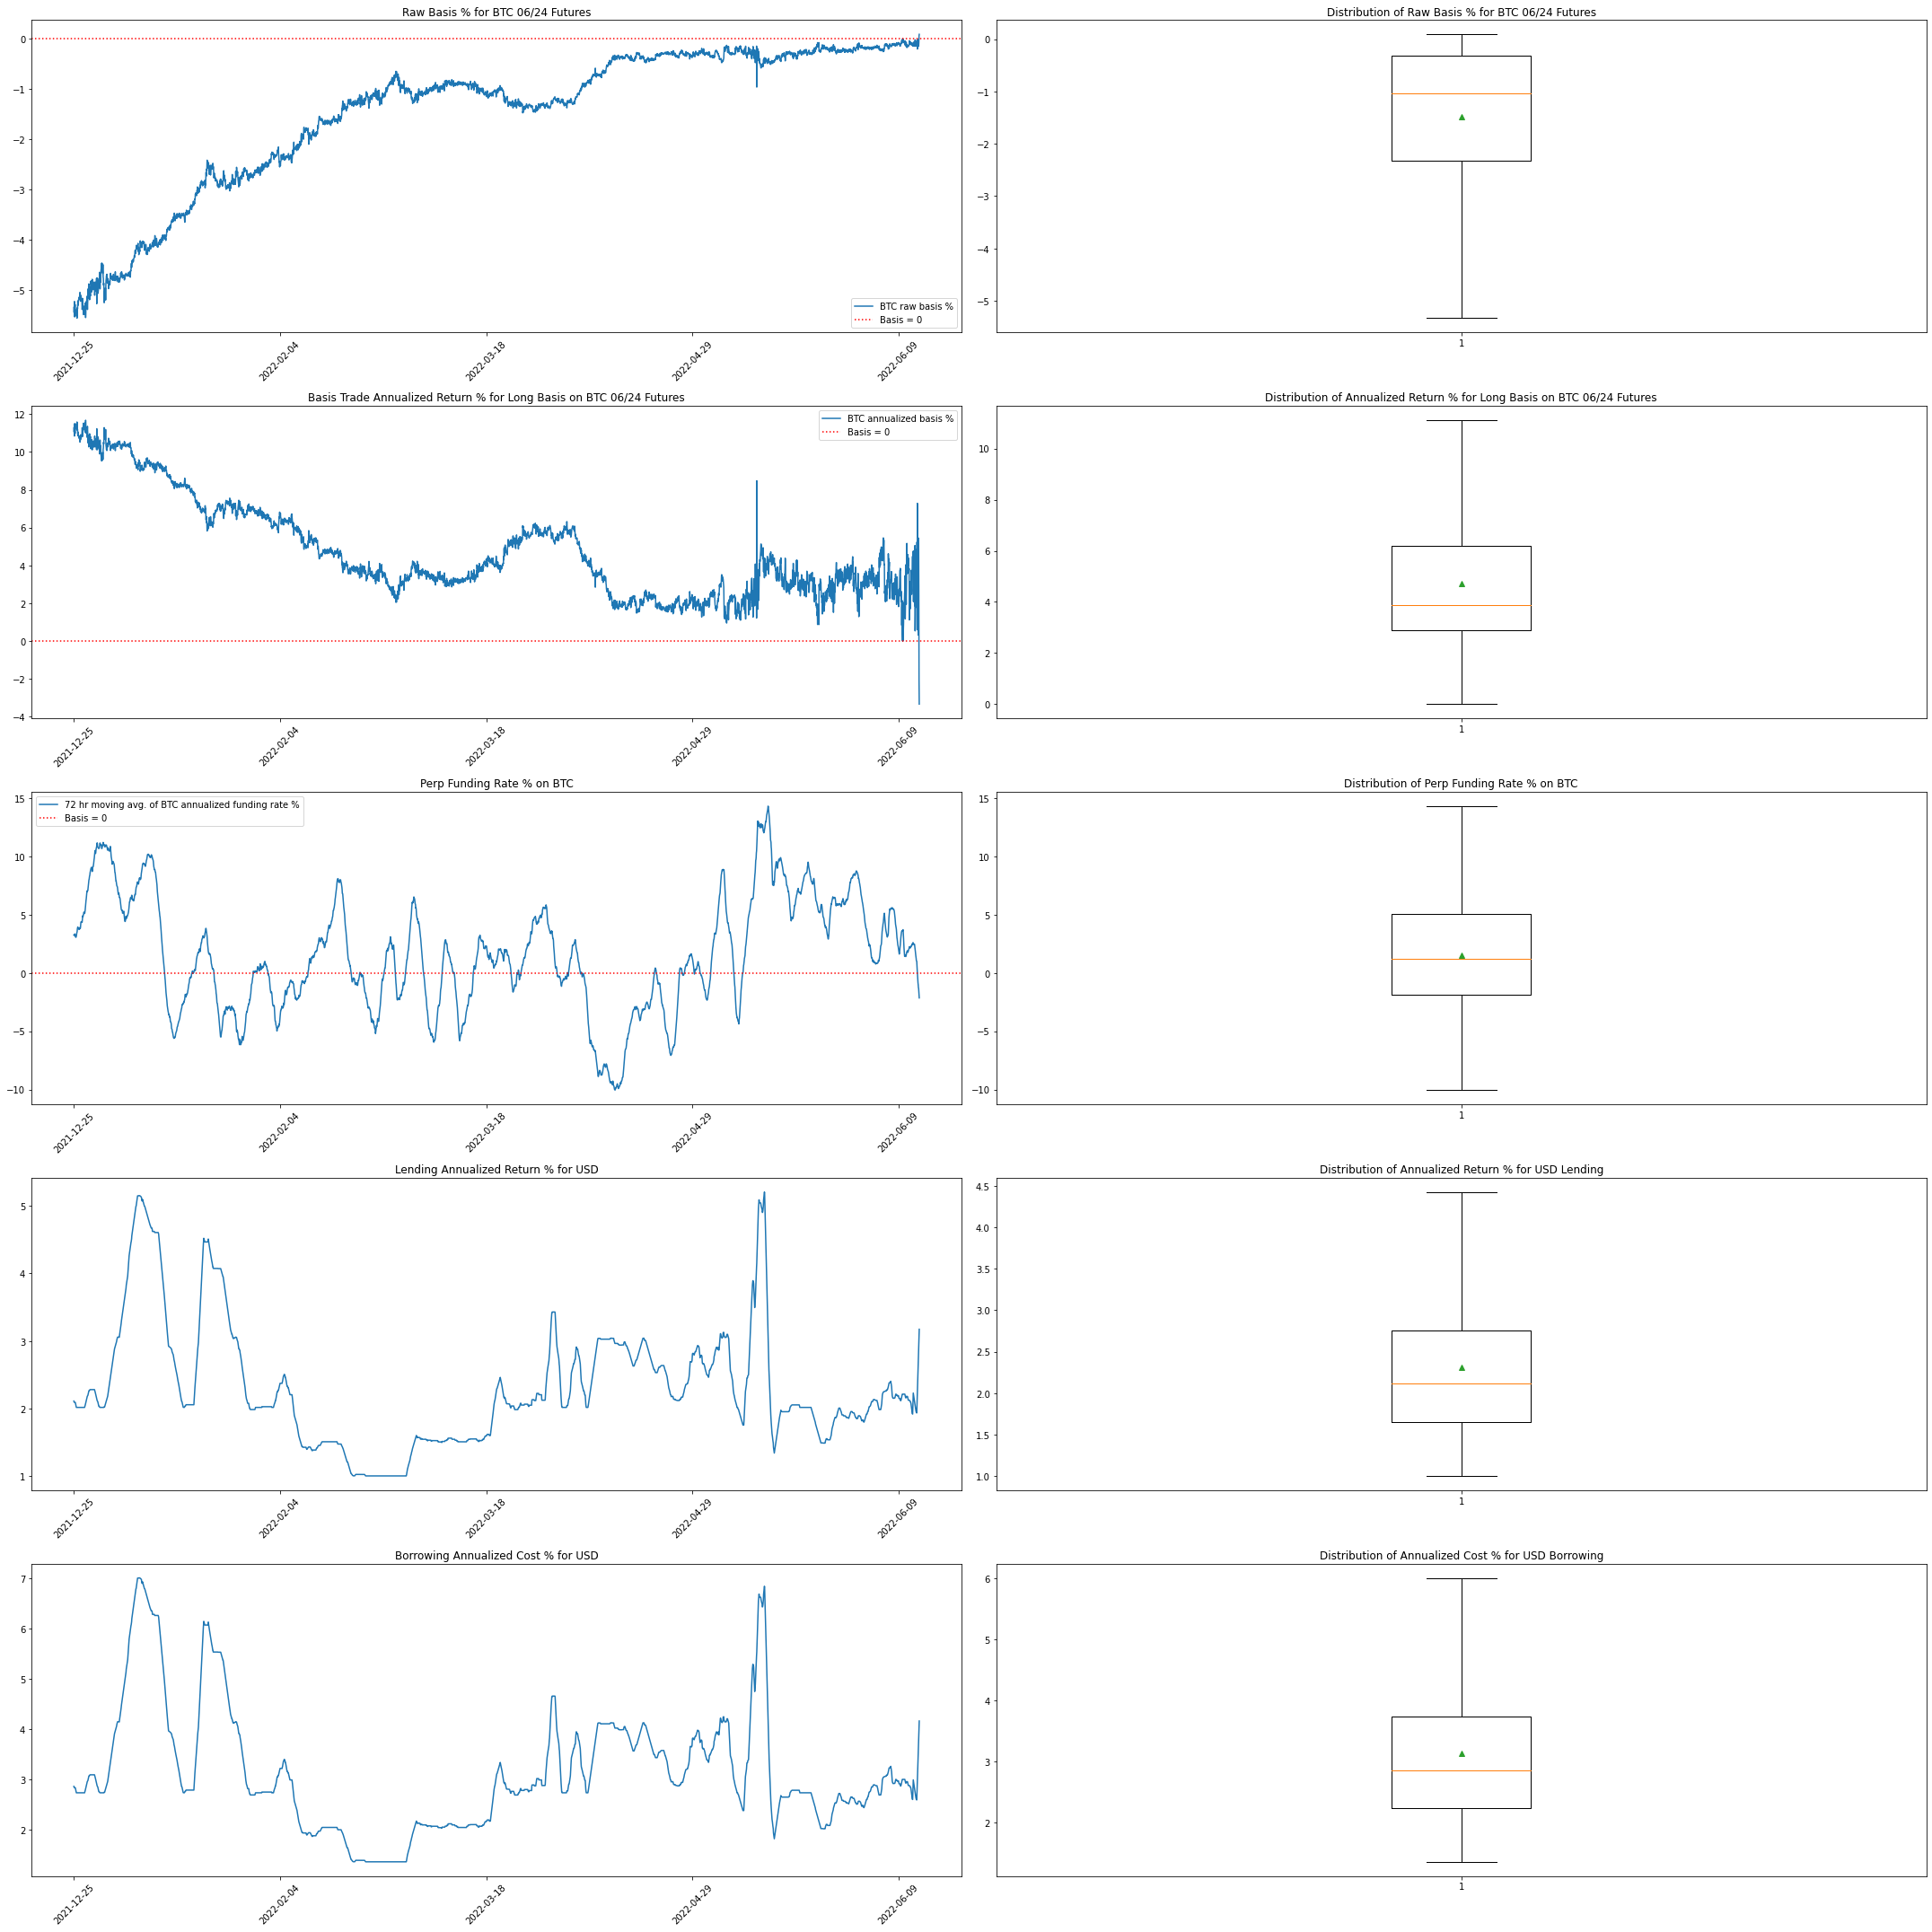

In [269]:
single_asset_0624_basis_info(
    bases0624,
    bases0624_annualized,
    funding_rates0624_annualized,
    lending_rates0624_annualized,
    borrow_rates0624_annualized,
    "BTC"
)

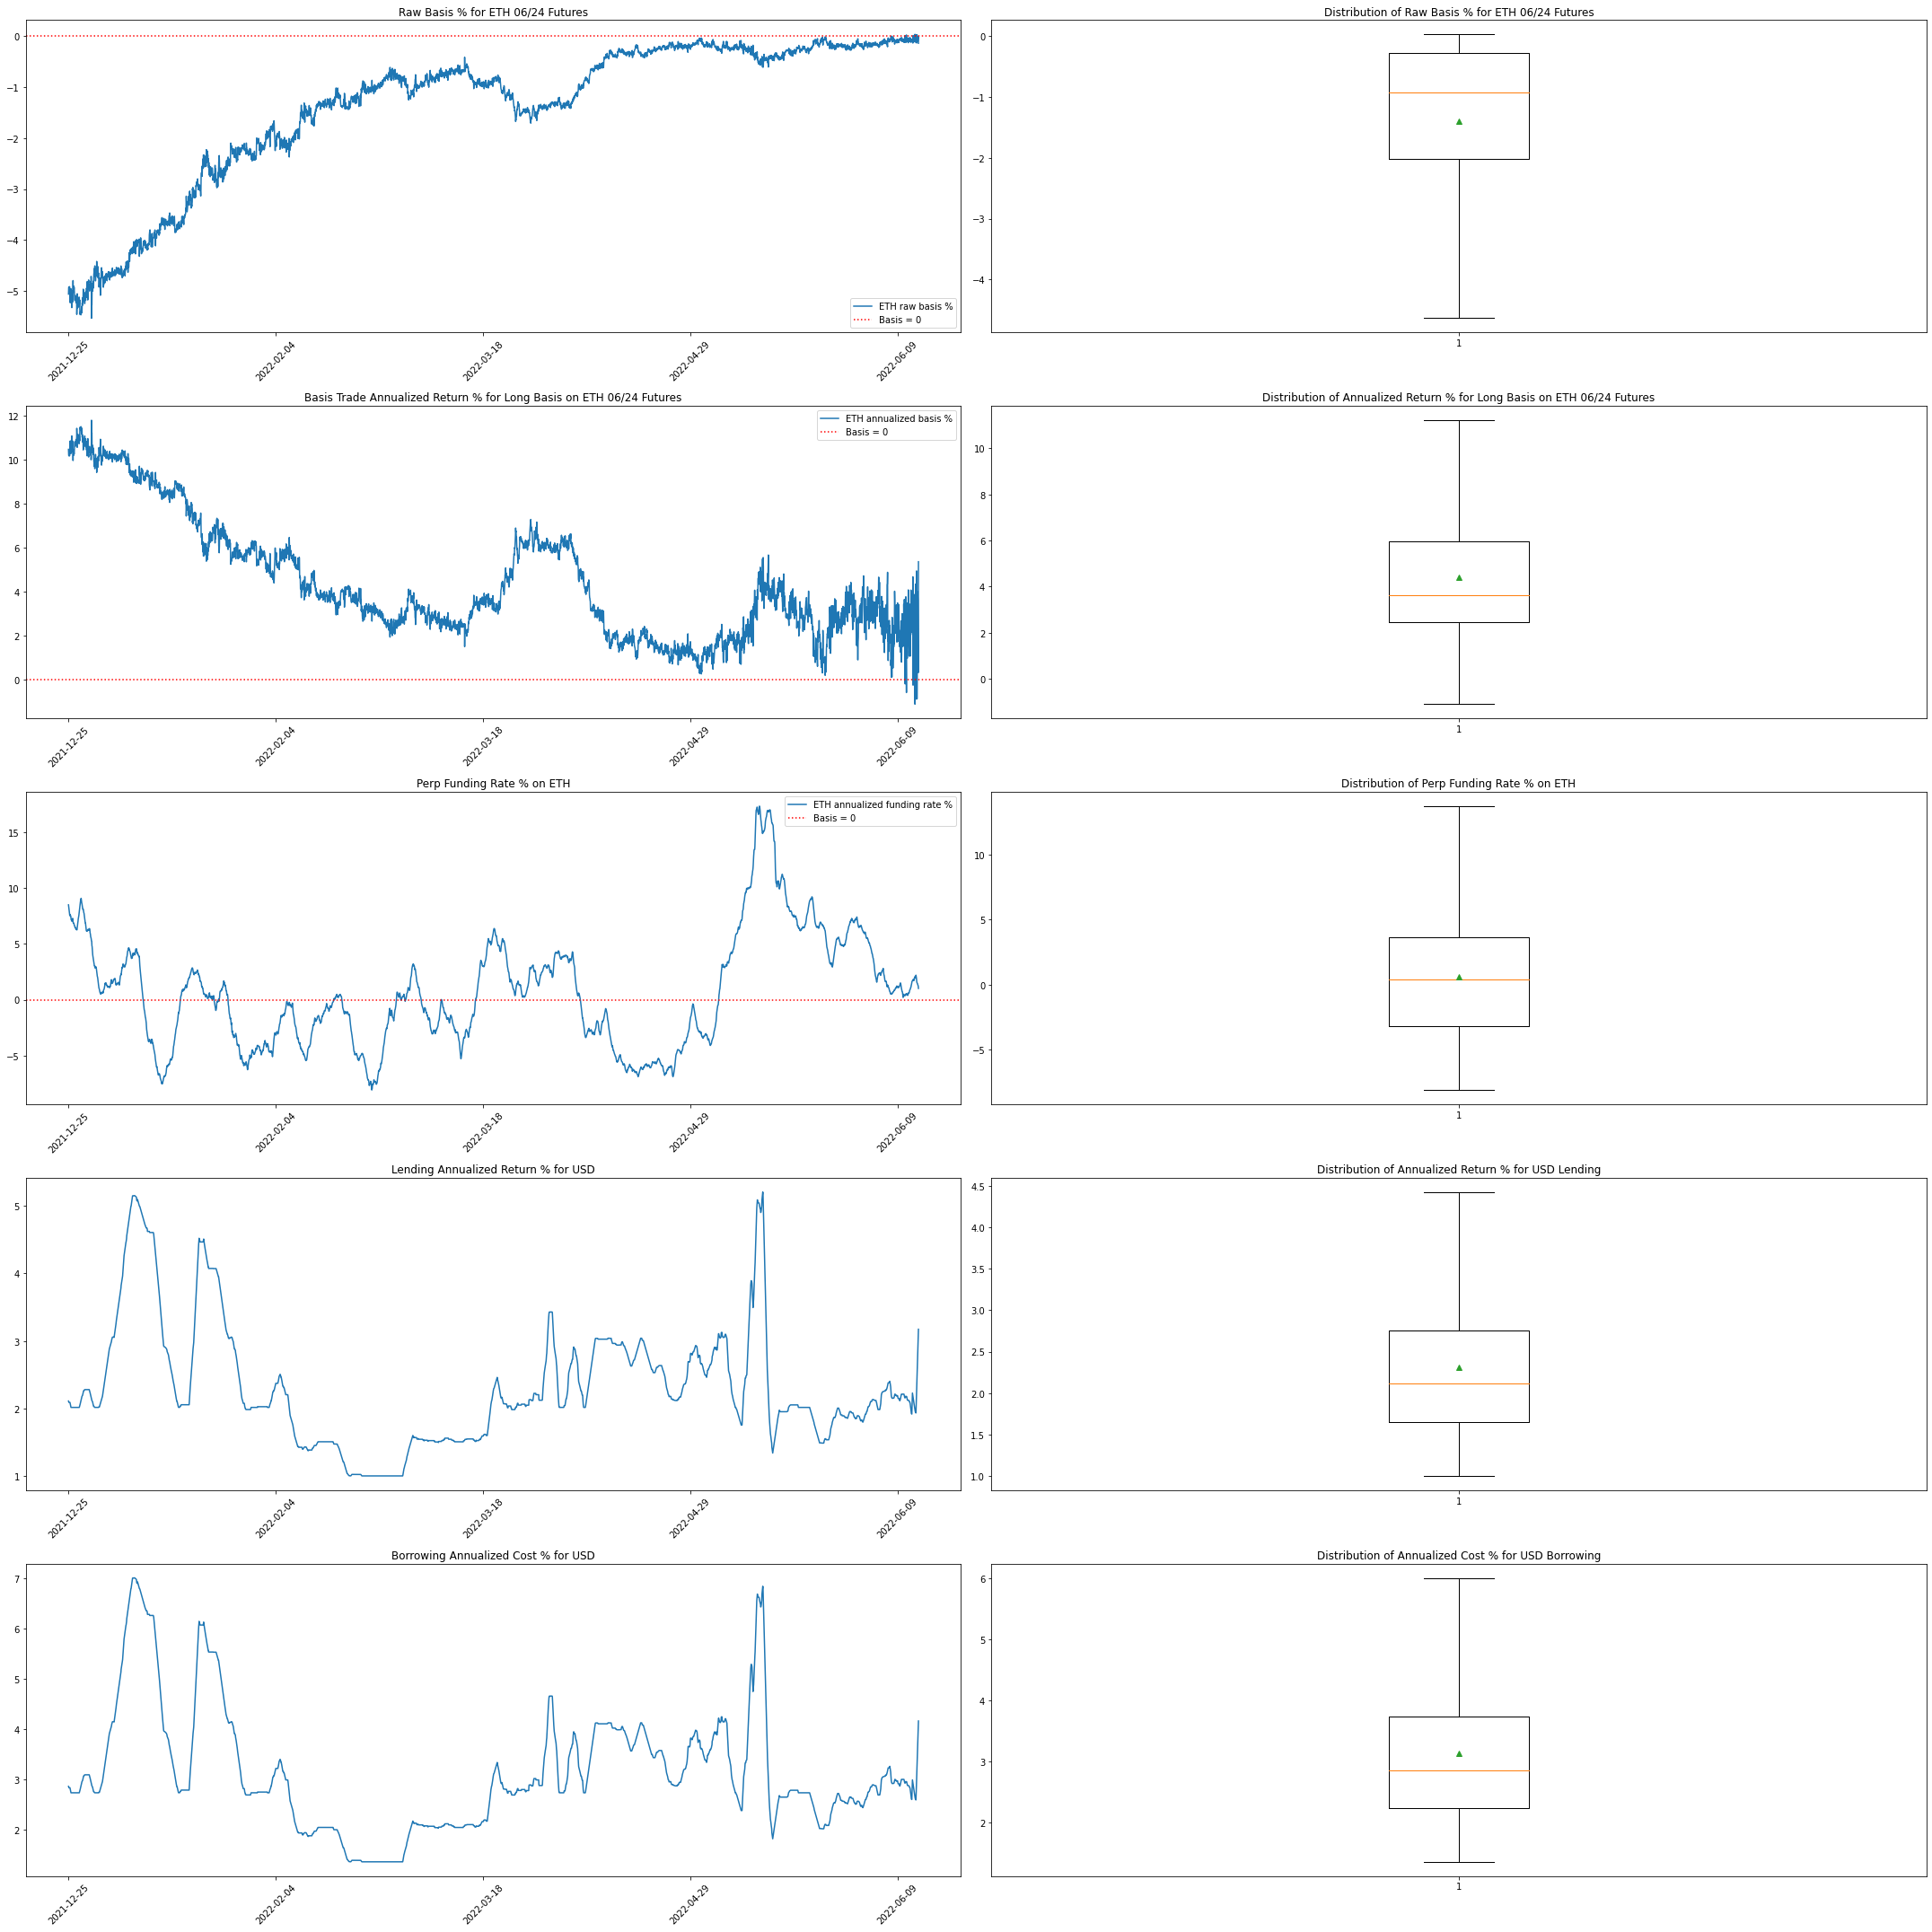

In [265]:
single_asset_0624_basis_info(
    bases0624,
    bases0624_annualized,
    funding_rates0624_annualized,
    lending_rates0624_annualized,
    borrow_rates0624_annualized,
    "ETH"
)

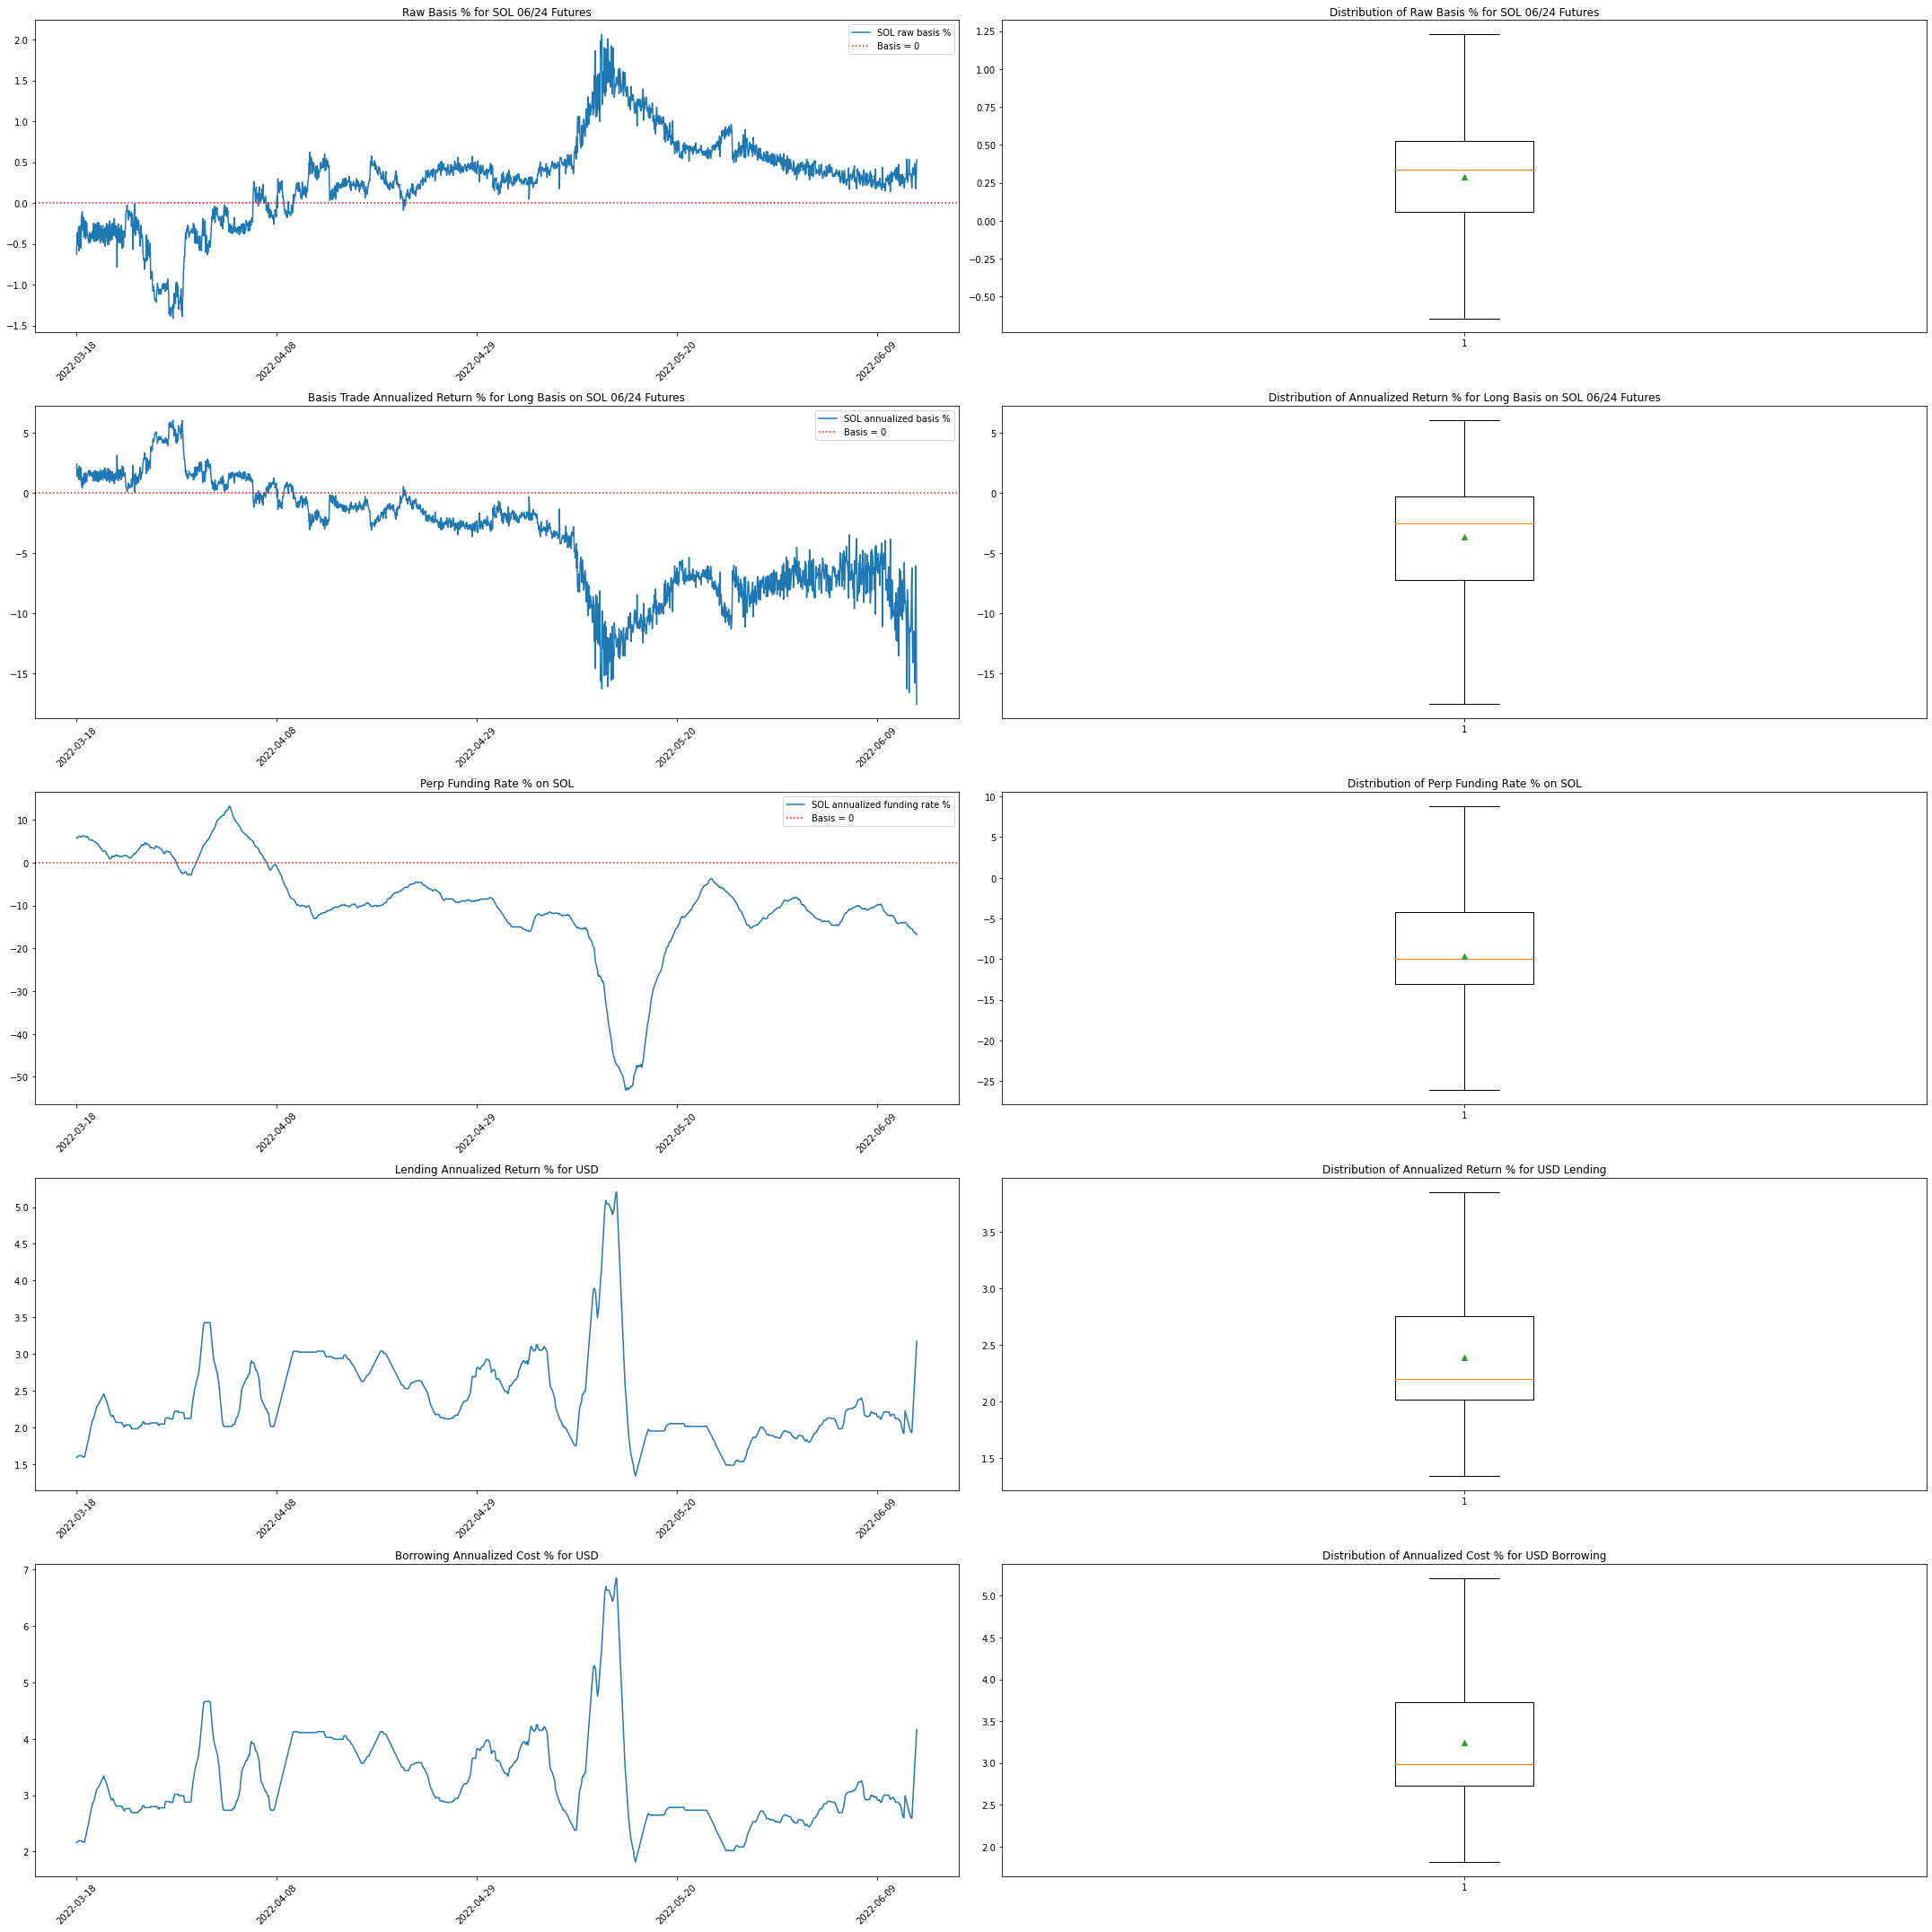

In [266]:
single_asset_0624_basis_info(
    bases0624,
    bases0624_annualized,
    funding_rates0624_annualized,
    lending_rates0624_annualized,
    borrow_rates0624_annualized,
    "SOL"
)

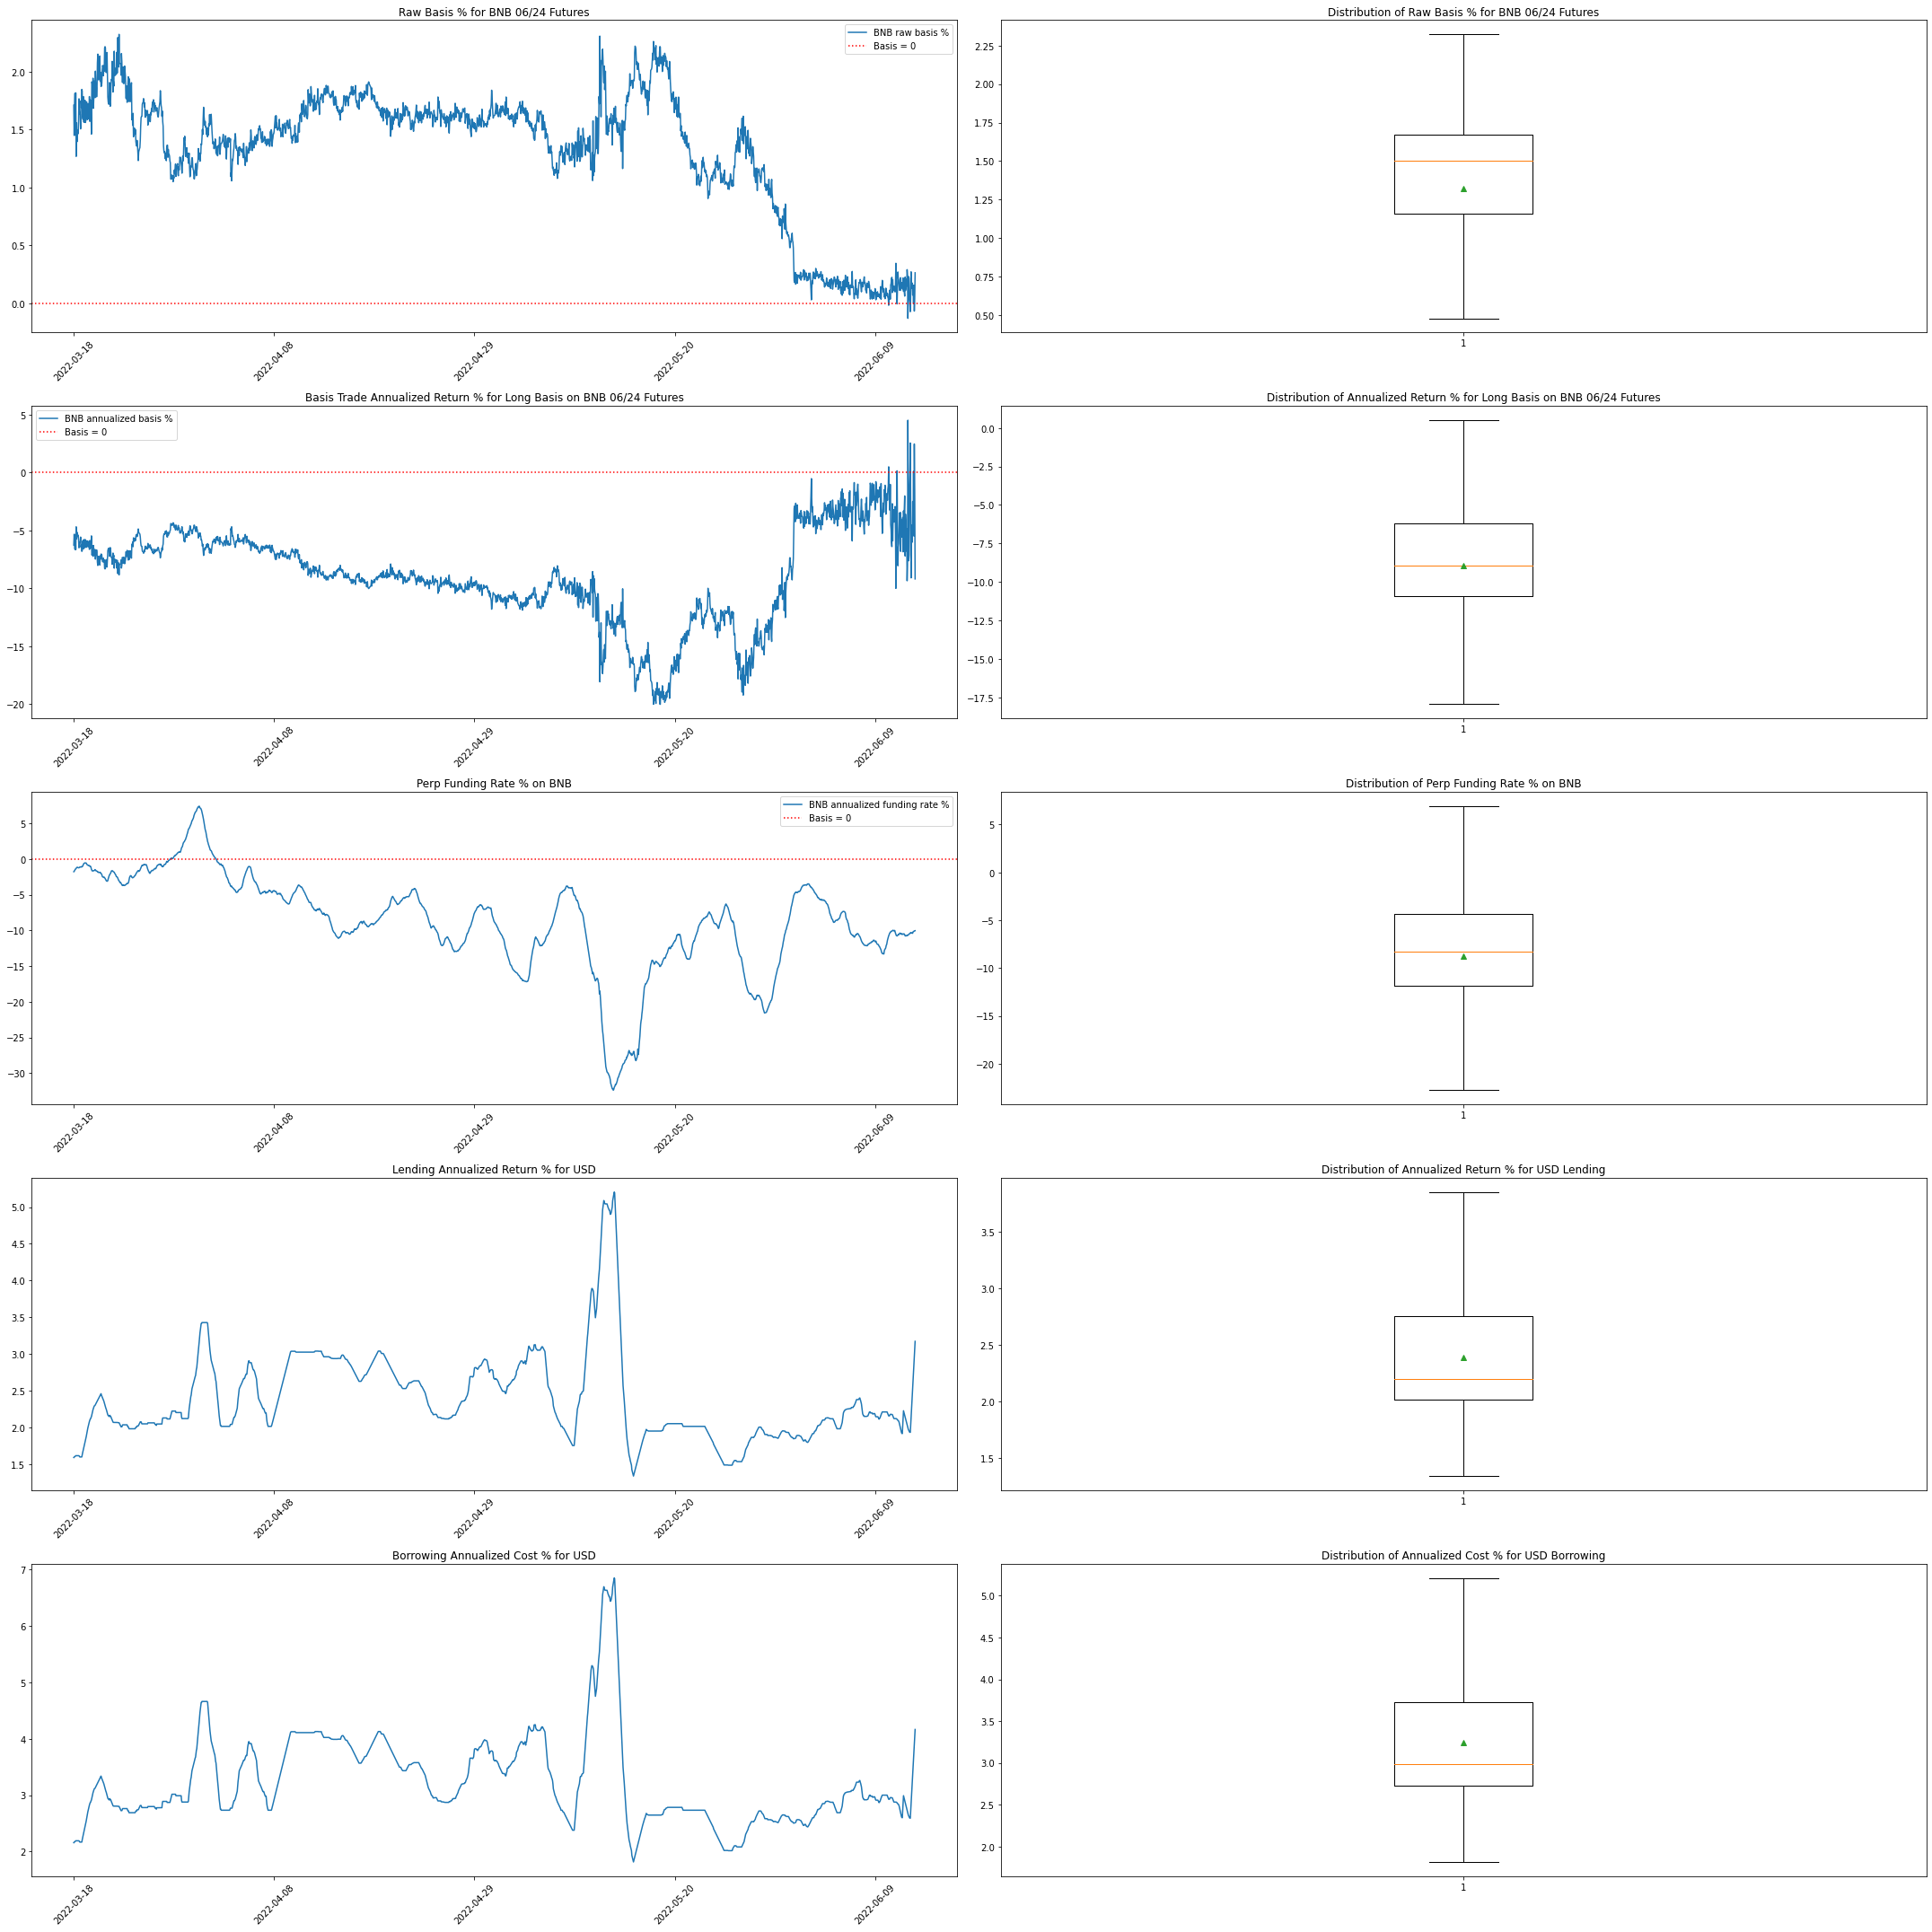

In [267]:
single_asset_0624_basis_info(
    bases0624,
    bases0624_annualized,
    funding_rates0624_annualized,
    lending_rates0624_annualized,
    borrow_rates0624_annualized,
    "BNB"
)

In [ ]:
"""
Historical Basis Drawdown Risk: what’s the max diff that a basis has done for the sep 30 contract so far? Demonstrate that it’s fairly marginal.

Note: this can be demonstrated by showing the raw basis graphs.
"""


In [ ]:
"""
Historical basis (many coins) & USD interest rates. Show that when USD interest rates are high, the basis is very negative.
"""

In [ ]:
"""
Historical basis (single coin) & interest rate for that coin. Show that high basis on a coin typically means low interest rate for that coin (since otherwise they’d lend out that coin while borrowing USD)
"""

In [ ]:
"""
Make a graph showing relationship between USDC lending rates and perp funding rates
"""